# Linear Regression and Stochastic Gradient Descent

<div style="float:right; font-style:italic;color:#AAAAAA">Author:Winglok</div><br>
<div style="float:right; font-style:italic;color:#AAAAAA">From:SCUT</div>

**Download the dataset "housing_scale":**

In [1]:
import requests
r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')

**Load the dataset to X,y:**

In [2]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
X, y = load_svmlight_file(f=BytesIO(r.content), n_features=13)
X = X.toarray()

**Preprocess, change the shape of X and y:**

In [3]:
import numpy
n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

**Devide the dataset into traning set and validation set(traning size is 3/4,and validation size is rest here):**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

**Define regular term coefficients learning rate and max epoches:**

In [5]:
penalty_factor = 0.01
learning_rate = 0.001
max_epoch = 3500
losses_train = []
losses_val = []

**Initialize w by different ways(using all zeros here):**

In [6]:
# select different initializing method
w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
# w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

**Closed solution to linear regression**：

$$\hat w=(X^{T}X)^{-1}X^Ty$$

In [7]:
X_train_t=X_train.transpose()
temp1=numpy.dot(X_train_t,X_train)
temp2=numpy.dot(numpy.linalg.inv(temp1),X_train_t)
w=numpy.dot(temp2,y_train)

**Loss function**：

$$L=\frac 1 {2m} \sum_{i=1}^m{(y_i-X_i\omega)^2}$$ or $$L=\frac 1 {2m} ||y_i-X_i\omega||^2_2$$

In [8]:
Y_predict_closed = numpy.dot(X_train, w)  # predict under the train set
loss_train_closed = 1/2*numpy.average(numpy.square(Y_predict_closed-y_train))

Y_predict_closed = numpy.dot(X_val, w)  # predict under the validation set
loss_val_closed = 1/2*numpy.average(numpy.square(Y_predict_closed-y_val)) 

Y_predict_closed = numpy.dot(X, w)  # under all dataset
loss_closed=1/2*numpy.average(numpy.square(Y_predict_closed-y))
print("The loss under the train set is ",loss_train_closed)
print("The loss under the validation set is ",loss_val_closed)
print("The loss under all dataset is ",loss_closed)

The loss under the train set is  11.366724927728239
The loss under the validation set is  10.310000043399386
The loss under all dataset is  11.101499512096295


**Train and predict by Stochastic Gradient Descent(SGD):**

<span style=font-size:15>*Here are fomulas used below:*</span> 

<span style="font-style:italic">we have loss function with L1 regularization（Lasso regression）</span>:

$$L=\frac 1 {2m} \sum_{i=1}^m{(y_i-X_i\omega)^2}+\frac {\lambda} m ||\omega||_1$$ or $$L=\frac 1 {2m} ||y_i-X_i\omega||^2_2+\frac {\lambda} m ||\omega||_1$$

<span style="font-style:italic">the gradient is</span>:

$$G=\frac {\partial L} {\partial \omega}=-\frac 1 m (\sum_{i=1}^m{y_i X_i^T} -(\sum_{i=1}^m {X_i^T X_i})\omega-\lambda sgn(\omega))$$

<span style="font-style:italic;color:#9a9898">Details about the above derivation：</span>

<span style="font-style:italic;color:#9a9898">for above formula, X is a $m\times13$ matric，and $X_i$ is a row vector which represents a sample with 13 properties, then $\omega$ is a $13\times1$ matric which from $\omega_1$ to $\omega_{13}$,so we can seek partial guidance on $\omega_1$（Without loss of generality, We regard that X:$m\times n$ $\omega$:$n\times 1$y:$m\times1$):$$\frac {\partial L} {\partial \omega_1}=\frac {\partial {\frac 1 {2m} \sum_{i=1}^m{(y_i-X_i\omega)^2}+\frac {\lambda} m ||\omega||_1}} {\partial \omega_1}$$<br>$$=\frac 1 m \sum_{i=1}^m{(y_i-X_i\omega)}\frac{\partial {\sum_{i=1}^m {(y_i-X_i\omega)}}}{\partial \omega_1}+\frac \lambda m sgn(\omega_1)$$<br>$$=\frac 1 m \sum_{i=1}^m{(y_i-X_i\omega)}\frac{\partial {(y_1-X_{11}\omega_1-X_{12}\omega_2-\cdots-X_{1n}\omega_n+y_2-X_{21}\omega_1-X_{22}\omega_2-\cdots-X_{2n}\omega_n+\cdots+y_m-X_{m1}\omega_1-X_{m2}\omega_2-\cdots-X_{mn}\omega_n)}}{\partial \omega_1}+\frac \lambda m sgn(\omega_1)$$<br>$$=\frac 1 m \sum_{i=1}^m{(y_i-X_i\omega)}(-X_{11}-X_{21}-\cdots-X_{m1})+\frac \lambda m sgn(\omega_1) $$<br>$$=-\frac 1 m \sum_{i=1}^m{(y_i-X_i\omega)}\sum_{j=1}^m {X_{j1}}+\frac \lambda m sgn(\omega_1) $$We can also get follow formula and so on:$$\frac {\partial L} {\partial \omega_2}=-\frac 1 m \sum_{i=1}^m{(y_i-X_i\omega)}\sum_{j=1}^m {X_{j2}}+\frac \lambda m sgn(\omega_2)$$thus:$$\frac {\partial L} {\partial \omega}=\begin{bmatrix}{\frac {\partial L} {\partial \omega_1}}\\ {\frac {\partial L} {\partial \omega_2}}\\ {\cdots}\\ {\frac {\partial L} {\partial \omega_n}}\\ \end{bmatrix}$$and$$\begin{bmatrix}{\sum_{j=1}^m {X_{j1}}}\\{\sum_{j=1}^m {X_{j2}}}\\{\cdots}\\{\sum_{j=1}^m {X_{jn}}}\\ \end{bmatrix}=\sum_{i=1}^m X_i^T$$and finally we get:$$\frac {\partial L} {\partial \omega}=-\frac 1 m \sum_{i=1}^m {(y_i-X_i\omega)X_i^T}+\frac \lambda m sgn(\omega)$$<br>$$=-\frac 1 m (\sum_{i=1}^m{y_i X_i^T} -(\sum_{i=1}^m {X_i^T X_i})\omega-\lambda sgn(\omega))$$</span>


 <span style="font-style:italic">update</span> 

$$\omega=\omega-\eta G$$

**pre process:** 

In [9]:
def sgn(v):       
    num=0
    for i in v:
        if i>0:
            v[num]=1
        if i<0:
            v[num]=-1
        if i==0:
            v[num]=0
        num+=1

 **training and iteration:**

In [10]:
import random
w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
for epoch in range(max_epoch):
    r=random.randint(0,X_train.shape[0]-1)
    X_train_s=X_train[r]
    y_train_s=y_train[r]
    X_train_s_t=X_train_s.reshape(X_train_s.shape[0],1)#choose one sample 

    G = -((y_train_s-numpy.dot(X_train_s,w))*(X_train_s_t)-penalty_factor*w)# calculate the gradient
    G = -G
    w += learning_rate * G  # update the parameters

    Y_predict = numpy.dot(X_train_s, w)  # predict under the train set
    loss_train = 1/2*(numpy.square(Y_predict-y_train_s))# calculate 
    losses_train.append(loss_train)

    Y_predict = numpy.dot(X_val, w)  # predict under the validation set
    loss_val = 1/2*numpy.average(numpy.square(Y_predict-y_val)) # calculate 
    losses_val.append(loss_val)

**Plot loss values with the number of iterations:**

Text(0.5,1,'The graph of SGD loss value varing with the number of iterations and its closed solution')

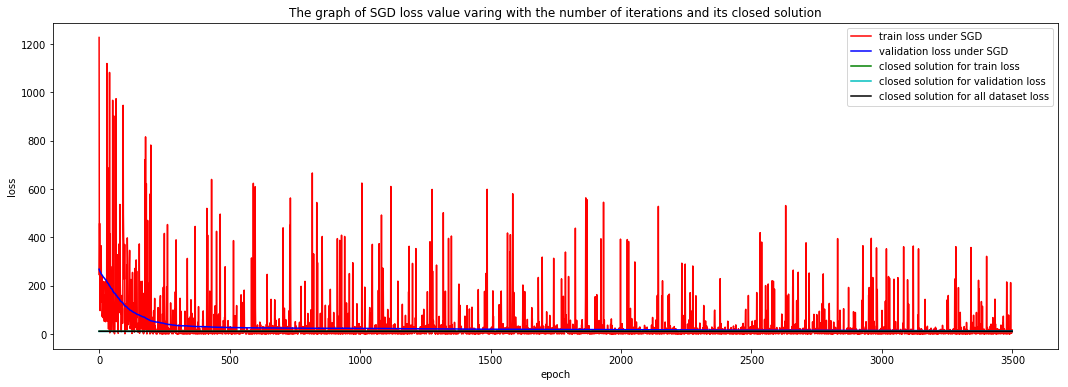

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
losses_train_closed=[]
losses_val_closed=[]
losses_closed=[]
plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss under SGD")
plt.plot(losses_val, "-", color="b", label="validation loss under SGD")
for i in range(3500):
    losses_train_closed.append(loss_train_closed)
    losses_val_closed.append(loss_val_closed)
    losses_closed.append(loss_closed)
plt.plot(losses_train_closed, "-", color="g", label="closed solution for train loss")
plt.plot(losses_val_closed, "-", color="c", label="closed solution for validation loss")
plt.plot(losses_closed, "-", color="k", label="closed solution for all dataset loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of SGD loss value varing with the number of iterations and its closed solution")

<span style="color:#9a9898">References:</span>

<span style="color:#9a9898">1.机器学习之正则化（Regularization）[EB/OL]. https://www.cnblogs.com/jianxinzhou/p/4083921.html.<br>
2.回归系列之L1和L2正则化[EB/OL]. https://www.jianshu.com/p/a47c46153326.<br>
3.机器学习总结(一)：线性回归、岭回归、Lasso回归[EB/OL]. https://blog.csdn.net/hzw19920329/article/details/77200475.<br>
4.正则化为什么能防止过拟合[EB/OL]. https://www.cnblogs.com/alexanderkun/p/6922428.html.<br>
5.最优化方法：梯度下降（批梯度下降和随机梯度下降）[EB/OL]. https://blog.csdn.net/pipisorry/article/details/23692455.<br>
6.梯度下降、随机梯度下降和批量梯度下降[EB/OL]. https://www.cnblogs.com/louyihang-loves-baiyan/p/5136447.html.<br>
7.Markdown 数学公式[EB/OL]. http://blog.lisp4fun.com/2017/11/01/formula.<br>
8.Markdown公式编辑学习笔记[EB/OL]. https://www.cnblogs.com/q735613050/p/7253073.html.<br>
9.NumPy 中文文档[EB/OL]. https://www.numpy.org.cn/.
</span>




 